In [69]:
import pandas as pd
import numpy as np

In [70]:
idx_happiness = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_삶의만족도.xlsx")
idx_health = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_건강.xlsx")
idx_safety = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_안전.xlsx")
idx_nature = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_환경.xlsx")
idx_economy = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_경제.xlsx")
idx_education = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_교육.xlsx")
idx_relationship = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_관계 및 사회참여.xlsx")
idx_leisure = pd.read_excel("./2019 한국 행복지도/대한민국행복지도_여가.xlsx")

In [71]:
city = list(idx_happiness["시도"].unique())
merged_idx = pd.DataFrame({"시도": city})
merged_idx

,시도
0,서울특별시
1,부산광역시
2,대구광역시
3,인천광역시
4,광주광역시
5,대전광역시
6,울산광역시
7,세종특별자치시
8,경기도
9,강원도


In [ ]:
idx_data = [idx_health, idx_safety, idx_nature, idx_economy, idx_education, idx_relationship, idx_leisure]
idx_colname = ["건강", "안전", "환경", "경제", "교육", "관계및    사회참여", "여가"]

merged_idx = pd.merge(merged_idx, idx_happiness.groupby("시도")["삶의 만족도"].mean(), on="시도")

for idx, val in enumerate(idx_data):
    merged_idx = pd.merge(merged_idx, val.groupby("시도")["평균"].mean().rename(idx), on="시도")
for idx, val in enumerate(idx_colname):
    merged_idx.rename(columns={idx: val}, inplace=True)

merged_idx.isnull().sum()

시도         0
삶의 만족도     0
건강         0
안전         0
환경         0
경제         0
교육         0
관계및사회참여    0
여가         0
dtype: int64

In [74]:
merged_idx.describe()

,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.518189,0.409401,0.420882,0.579406,0.407635,0.578653,0.497632,0.464910
std,0.138257,0.127636,0.123557,0.097299,0.111265,0.125408,0.114394,0.176206
min,0.362081,0.232000,0.157800,0.393440,0.196543,0.399412,0.294719,0.153587
25%,0.411480,0.329506,0.358429,0.515020,0.386861,0.488533,0.402183,0.347960
50%,0.490972,0.401064,0.446100,0.582380,0.410820,0.587000,0.487464,0.454980
75%,0.553100,0.482325,0.484835,0.652400,0.468926,0.648047,0.601532,0.632750
max,0.907700,0.663580,0.573155,0.735600,0.642580,0.840780,0.676440,0.702891


In [80]:
happiness_map = merged_idx.set_index("시도")
happiness_map.mean(numeric_only=True, axis=1)

시도
서울특별시      0.461637
부산광역시      0.389815
대구광역시      0.422433
인천광역시      0.418799
광주광역시      0.520068
대전광역시      0.497017
울산광역시      0.532900
세종특별자치시    0.521288
경기도        0.472481
강원도        0.526015
충청북도       0.500400
충청남도       0.508128
전라북도       0.488729
전라남도       0.500111
경상북도       0.436254
경상남도       0.482856
제주특별자치도    0.559075
dtype: float64

In [87]:
happiness_corr = happiness_map.corr()
happiness_corr

,삶의 만족도,건강,안전,환경,경제,교육,관계및사회참여,여가
삶의 만족도,1.000000,-0.570466,-0.191709,0.572262,-0.057815,-0.113522,0.519122,0.497880
건강,-0.570466,1.000000,-0.210138,-0.357841,0.071809,0.242186,-0.175048,-0.405151
안전,-0.191709,-0.210138,1.000000,-0.124581,-0.142781,-0.519065,-0.444827,0.382730
환경,0.572262,-0.357841,-0.124581,1.000000,-0.716187,-0.146646,0.169838,0.494416
경제,-0.057815,0.071809,-0.142781,-0.716187,1.000000,0.451395,0.298562,-0.367461
교육,-0.113522,0.242186,-0.519065,-0.146646,0.451395,1.000000,0.462585,-0.070109
관계및사회참여,0.519122,-0.175048,-0.444827,0.169838,0.298562,0.462585,1.000000,0.216653
여가,0.497880,-0.405151,0.382730,0.494416,-0.367461,-0.070109,0.216653,1.000000


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

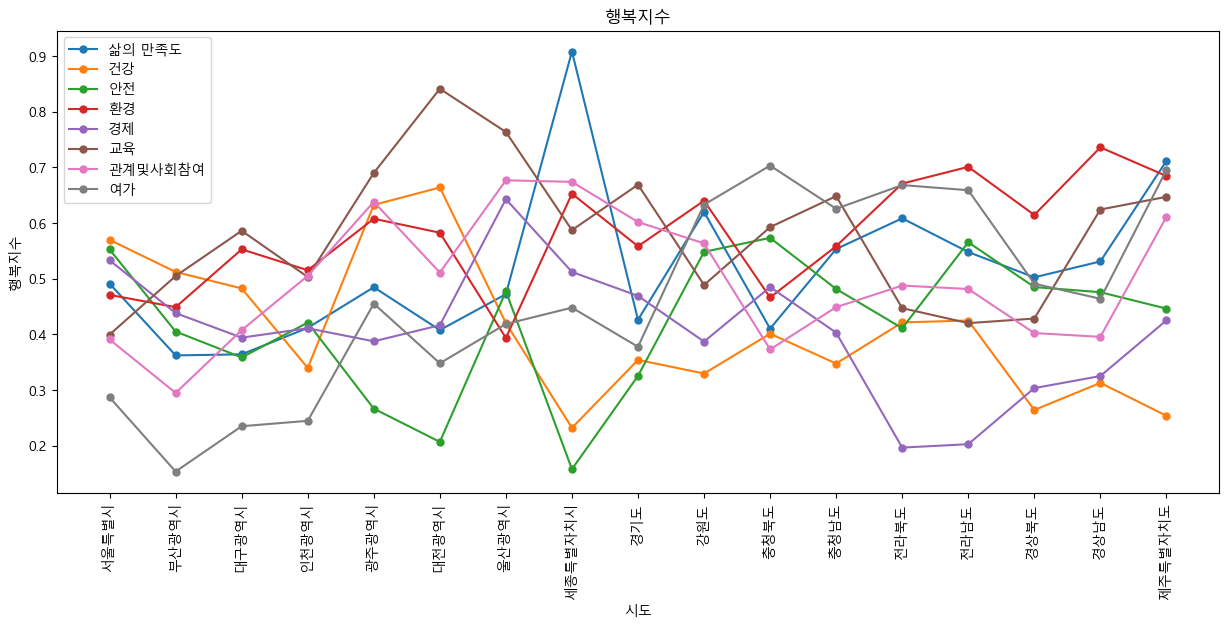

In [99]:
items = list(happiness_map.columns[:])

plt.figure(figsize=(15, 6))
for item in items:
    plt.plot(happiness_map[item], label=item, marker="o", markersize=5)
plt.title("행복지수")
plt.xlabel("시도")
plt.xticks(range(17), rotation=90)
plt.ylabel("행복지수")
plt.legend()
plt.show()

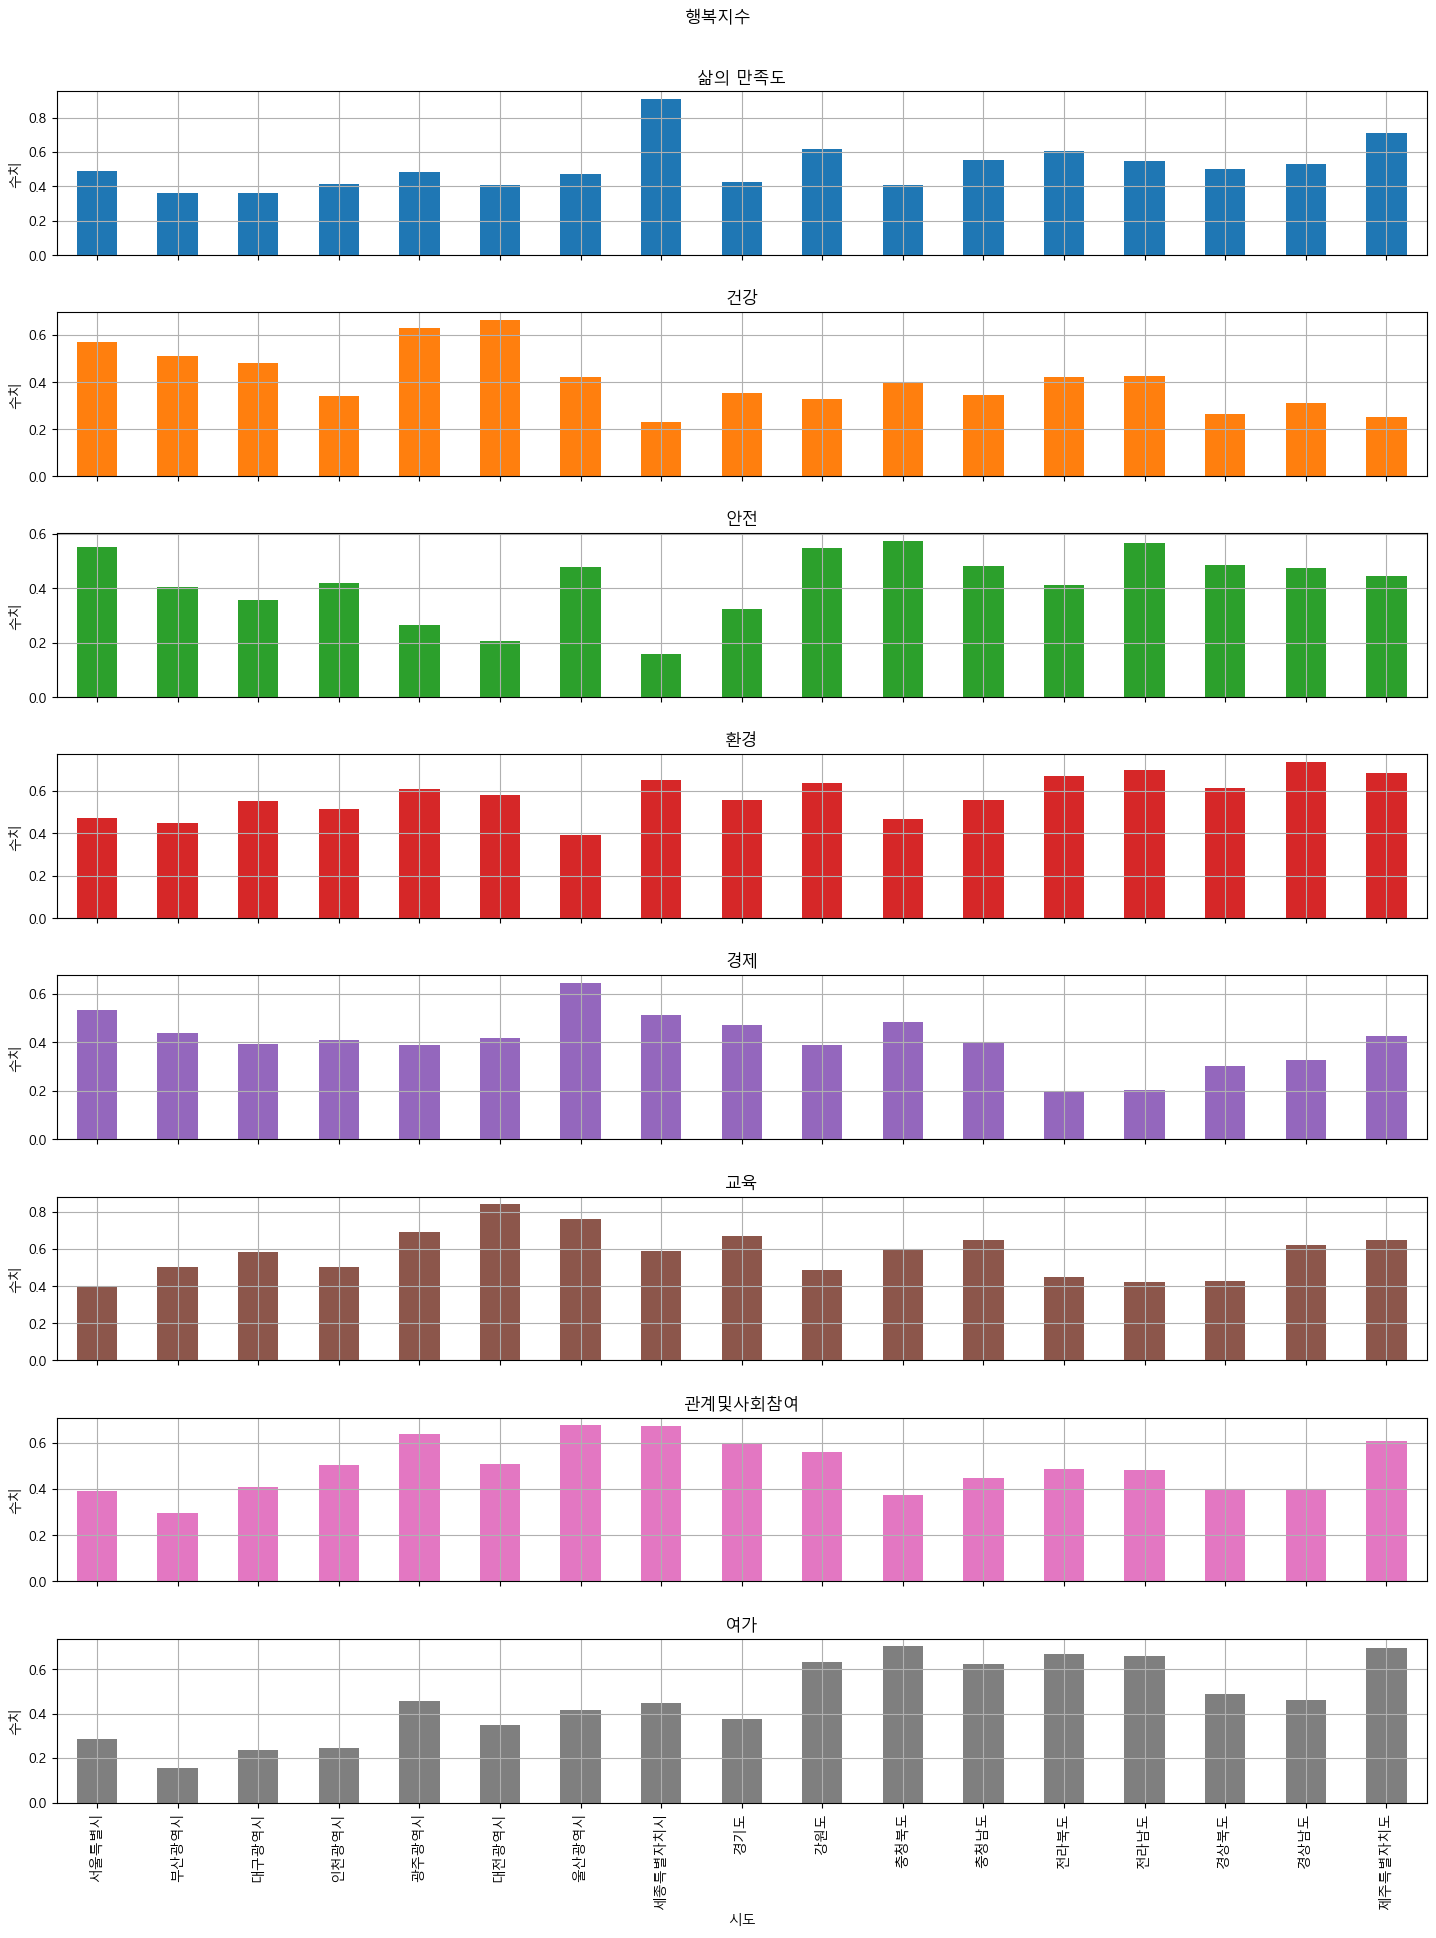

In [110]:
happiness_map.plot(kind="bar", figsize=(15, 20), ylabel="수치", xlabel="시도", grid=True, subplots=True, legend=False)
plt.suptitle("행복지수")
plt.xticks(range(17), list(happiness_map.index), rotation=90)
plt.tight_layout(pad=3, h_pad=2)
plt.show()

<Axes: title={'center': '대한민국 행복지수 상관관계'}>

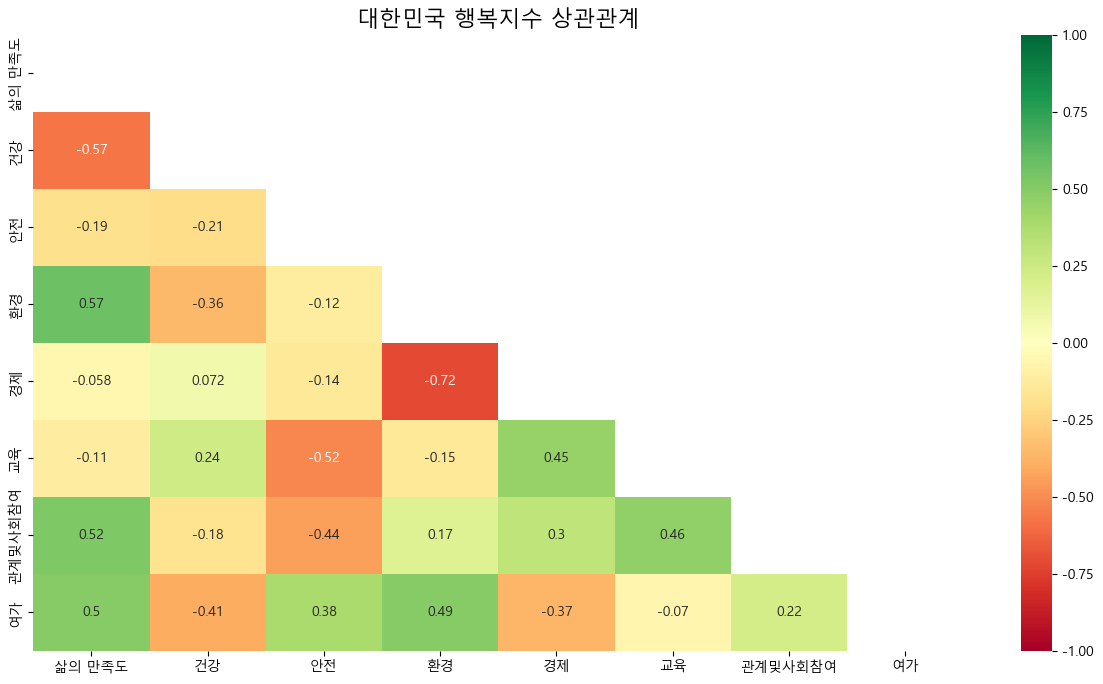

In [123]:
plt.figure(figsize=(15, 8))

plt.title("대한민국 행복지수 상관관계", fontsize=16)
sns.heatmap(happiness_corr, mask=np.triu(happiness_corr), annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
